In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80.

In this notebook the 120 kHz and 200 kHz transduecrs are calibrated with broadband with two spheres each (22 mm and 38.1 mm)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [2]:

sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

In [117]:

palette = sns.color_palette('colorblind')
plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

one_col = 85 *0.0393701
two_col = 170*0.0393701

savefigs_path= 'G:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/120kHz/'

# Function to real xml output

- Open Echoview .raw file of calibration
- Find strongest target region
- select in Sv and open Wideband Frequency Graph 
- Select instead TS variable and plot the strongest setions of the sphere
- Right-click graph and export graph data

Now open the export in python

In [82]:
cal_BB_333= pd.read_csv('G:/AFKABAN/2023_NyÅ_Calibrations/WBAT_279950_taped/333kHz/Wideband_frequency_response_graph_333.csv',skiprows=8)

### Mean curve
Take the mean of the maximum return curves for a MEAN maximum return target spectra

In [87]:
max_TS = np.mean(cal_BB_333.iloc[:,:-2],1)

In [129]:
freq_measured = max_TS.index

### Extract theoretical curve
Read theoretical curve from example .xml file from EK80

In [90]:
EKref = pd.read_xml('G:/AFKABAN/2023_NyÅ_Calibrations/WBAT_279950_taped/333kHz/cal_333_test.xml', xpath=".//TargetReference")
freq = np.fromstring(EKref.Frequency[0], dtype=float, sep=';')
ts = np.fromstring(EKref.Response[0], dtype=float, sep=';')

Plot theoretical and measured TS

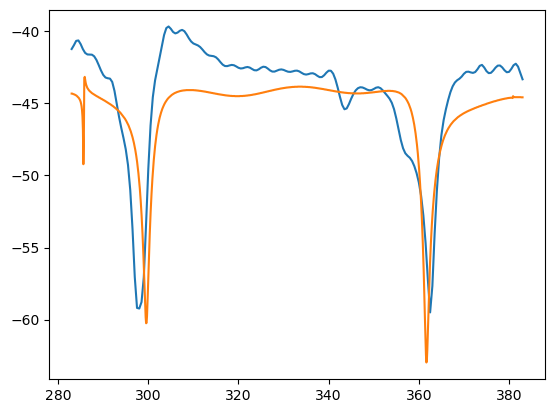

In [131]:
plt.plot(freq_measured,max_TS)
plt.plot(freq/1000,ts)

### Calculate Gain
Difference between measured, theoretical divided by old gain

In [149]:
gain = np.zeros(len(freq_measured))
for ind in range(len(freq_measured)):
    ts_i = np.where(freq >= freq_measured[ind]*1000)[0][0]
    gain[ind] = (max_TS[freq_measured[ind]]-ts[ts_i])/2+24


# Extract gain table
add to .ecs

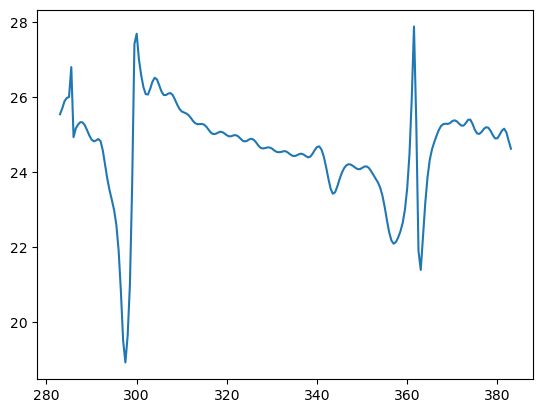

In [150]:
plt.plot(freq_measured,gain)

In [155]:
print(np.array2string(freq_measured*1000, separator=";"))

[283000.;283500.;284000.;284500.;285000.;285500.;286000.;286500.;287000.;
 287500.;288000.;288500.;289000.;289500.;290000.;290500.;291000.;291500.;
 292000.;292500.;293000.;293500.;294000.;294500.;295000.;295500.;296000.;
 296500.;297000.;297500.;298000.;298500.;299000.;299500.;300000.;300500.;
 301000.;301500.;302000.;302500.;303000.;303500.;304000.;304500.;305000.;
 305500.;306000.;306500.;307000.;307500.;308000.;308500.;309000.;309500.;
 310000.;310500.;311000.;311500.;312000.;312500.;313000.;313500.;314000.;
 314500.;315000.;315500.;316000.;316500.;317000.;317500.;318000.;318500.;
 319000.;319500.;320000.;320500.;321000.;321500.;322000.;322500.;323000.;
 323500.;324000.;324500.;325000.;325500.;326000.;326500.;327000.;327500.;
 328000.;328500.;329000.;329500.;330000.;330500.;331000.;331500.;332000.;
 332500.;333000.;333500.;334000.;334500.;335000.;335500.;336000.;336500.;
 337000.;337500.;338000.;338500.;339000.;339500.;340000.;340500.;341000.;
 341500.;342000.;342500.;343000.;34350